In [1]:
import numpy as np
import pandas as pd
from scipy.special import logit
from scipy.stats import multivariate_normal
import os
from scipy.stats import norm
import matplotlib.pyplot as plt 

In [52]:
x, y = np.array(np.meshgrid(np.arange(-5, 5, 1), np.arange(-5, 5, 1)))
X = np.empty(x.shape + (2,))
X[:, :, 0] = x; X[:, :, 1] = y
X.shape

(10, 10, 2)

In [53]:
mean1 = [-3, 3]
cov1 = [[0.5, 0], [0, 0.5]]

mean2 = [0, 0]
cov2 = [[2.5, 0], [0, 2.5]]

mean3 = [3, -3]
cov3 = [[0.25, 0], [0, 0.25]]

prob = multivariate_normal.pdf(X, mean=mean1, cov=cov1) + multivariate_normal.pdf(X, mean=mean2, cov=cov2) + multivariate_normal.pdf(X, mean=mean3, cov=cov3)
#prob /= prob.sum()
print(prob.sum())
sorted(prob.reshape(-1, 1).T[0])

3.01422852383


[2.8902492950897237e-06,
 1.7484989319560865e-05,
 1.7484989319560865e-05,
 4.6387482270458135e-05,
 7.0905128108962742e-05,
 7.0905128108964097e-05,
 0.0001057780213023689,
 0.0001057780213023689,
 0.00019274012128315407,
 0.00019274012136412147,
 0.00022164261423405135,
 0.00028446726992209037,
 0.00035119539857958449,
 0.00035119605466515675,
 0.00035126704069689491,
 0.00042895102847826186,
 0.00042895102847826186,
 0.00042895102847828902,
 0.00042895102847828902,
 0.00042895103173080858,
 0.00042967051367453547,
 0.00045797646948614556,
 0.0011660097860112775,
 0.0011660097860112775,
 0.0011660097876375511,
 0.0011660097876375511,
 0.0017394821964631108,
 0.0017394821964631108,
 0.0021246083525315535,
 0.0021246083525315535,
 0.0021246215303615031,
 0.0021246215303615031,
 0.0021535108454813598,
 0.0021535108454813598,
 0.0021622401317108685,
 0.0023374952636744614,
 0.0025950038139619918,
 0.0025950038139619918,
 0.0026094537482662904,
 0.0026094537482662904,
 0.00426936349492177

In [65]:
x = np.arange(-5.0, 5.0, 0.1)
prob = norm.pdf(x, loc=-3, scale=0.15) + norm.pdf(x, loc=3, scale=0.7) + norm.pdf(x, loc=0, scale=1.5)
prob /= 3

In [28]:
df.shape[0] % np.arange(-5, 5, 0.25).shape[0]
dfIter = df.iloc[:np.arange(-5, 5, 0.25).shape[0]]
dfIter.shape

(40, 3)

In [11]:
def computeRegretOneIter(df, truthPdf):
    optimalClickCount = df["n_exp"].sum() * truthPdf(df["bo_x"]).max()
    realClickCount = df["output"].sum()
    return optimalClickCount - realClickCount

def computerRegret(df, truthPdf, lenX):
    assert((df.shape[0] % lenX) == 0, "result dataframe has an incorrect size")
    curIndex = 0
    runningAvg = []
    while curIndex + lenX <= df.shape[0]:
        regret = computeRegretOneIter(df.iloc[curIndex: curIndex+lenX], truthPdf)
        curAvg = 0 if len(runningAvg)==0 else runningAvg[-1]
        N = len(runningAvg) + 1
        runningAvg.append(curAvg * (N-1) / N + regret / N)
        curIndex += lenX
    return runningAvg

def pdf(x):
    prob = norm.pdf(x, loc=-2, scale=0.3) + norm.pdf(x, loc=3, scale=0.7) + norm.pdf(x, loc=0, scale=1.5)
    return prob / 3.0

<ipython-input-11-2a18b8c9bc45>:7: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert((df.shape[0] % lenX) == 0, "result dataframe has an incorrect size")


In [15]:
x = np.array(range(np.arange(-5, 5, 0.25).shape[0]))
y = computerRegret(df, pdf, x.shape[0])

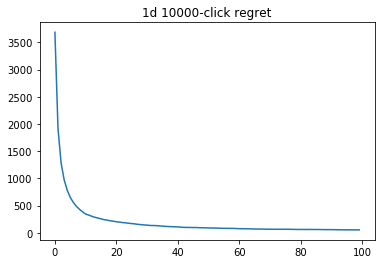

In [16]:
plt.plot(y[:100])
plt.title("1d 10000-click regret")
plt.show()

In [2]:
df=pd.DataFrame(list(zip(range(3), range(4,7))))

In [3]:
df

,0,1
0,0,4
1,1,5
2,2,6


In [5]:
df.to_csv("temp.csv", header=False, index=False)

In [7]:
np.arange(-5, 5.1, 0.1).shape

(101,)